# A/B testing Analysis project description:
## Miguel Herrera.

The objective of this analysis is to find out if changes implementing on a e-comerce platform has any effect on sales by conducting an A/B test. 

In this case, users are divided into two groups:

- Group A - control group - sees the platform without changes.
- Group B - test group - sees the platform with new features.
  
This way, the business can assess whether the changes are beneficial to the platform and whether they should be applied for everyone. However, it's crucial to analyze these data correctly and draw conclusions based on the analysis.

## Data

The file `data.csv` contains the metrics gatehered for groups A and B.  In this dataset, `AOV` means *Average Order Value*


In [8]:
# Import the Pandas library
import pandas as pd

# Load dataset from a csv file
data = pd.read_csv('data.csv')

# Display the dataset
display(data)

,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV,Group
0,90.987906,496.88,12,47.348084,A
1,50.794390,347.66,14,38.614252,A
2,66.206264,161.50,13,21.520578,A
3,61.225810,70.91,8,11.533441,A
4,122.862188,1014.99,14,90.846582,A
...,...,...,...,...,...
9995,110.375357,99.26,30,22.399053,B
9996,172.102860,52.29,40,29.303279,B
9997,134.548224,332.94,27,52.063372,B
9998,68.672467,233.74,24,28.713010,B


## Filtering Data

Isolating each group on its own dataframe

In [2]:
# Create filtered DataFrames
data_a = data[data['Group'] == 'A']
data_b = data[data['Group'] == 'B']

# Display both DataFrames
display(data_a)
display(data_b)

,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV,Group
0,90.987906,496.88,12,47.348084,A
1,50.794390,347.66,14,38.614252,A
2,66.206264,161.50,13,21.520578,A
3,61.225810,70.91,8,11.533441,A
4,122.862188,1014.99,14,90.846582,A
...,...,...,...,...,...
4995,101.266367,100.60,23,17.340411,A
4996,53.983563,183.99,14,20.652185,A
4997,74.526835,463.80,21,32.932672,A
4998,69.242324,23.59,15,8.553449,A


,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV,Group
5000,68.119998,80.77,17,15.306463,B
5001,46.363129,757.89,14,98.879776,B
5002,76.004365,34.47,14,8.435420,B
5003,70.897366,77.14,14,14.927193,B
5004,62.448103,937.23,15,118.719481,B
...,...,...,...,...,...
9995,110.375357,99.26,30,22.399053,B
9996,172.102860,52.29,40,29.303279,B
9997,134.548224,332.94,27,52.063372,B
9998,68.672467,233.74,24,28.713010,B


## Exploratory Data Analysis (EDA)

We conduct an EDA to get a summarization of data, obtain valuable insights into the basic characteristics and features of the dataset, making it useful for understanding patterns, trends, and distributions within the data. 

In [3]:
# Display descriptive statistics
display(data_a.describe())
display(data_b.describe())

,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,91.067536,208.178696,16.603400,27.764577
std,52.863039,321.006354,6.214936,46.197085
min,11.987637,0.000000,3.000000,0.000000
25%,55.434768,39.905000,12.000000,9.883202
50%,80.846721,95.675000,15.000000,16.036843
75%,116.526556,217.017500,20.000000,28.558765
max,788.816287,3809.110000,49.000000,1171.633427


,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,89.727811,203.876290,17.803200,26.666511
std,53.266944,298.960525,6.484572,35.945528
min,12.385792,0.000000,4.000000,0.000000
25%,54.461079,45.440000,13.000000,10.340919
50%,79.044170,112.465000,16.000000,17.538870
75%,115.288794,230.137500,21.000000,29.752410
max,925.234557,3773.200000,49.000000,891.007723


## Evaluating the Distributions
It is also useful to identify the distribution of collected data. Subsequently, by utilizing various graphs, we can draw conclusions about the data, to rule out potential bias.

In this case, we will use histograms to visualize the distributions for the columns `Total_Amount_Spent` and `AOV` for both groups.

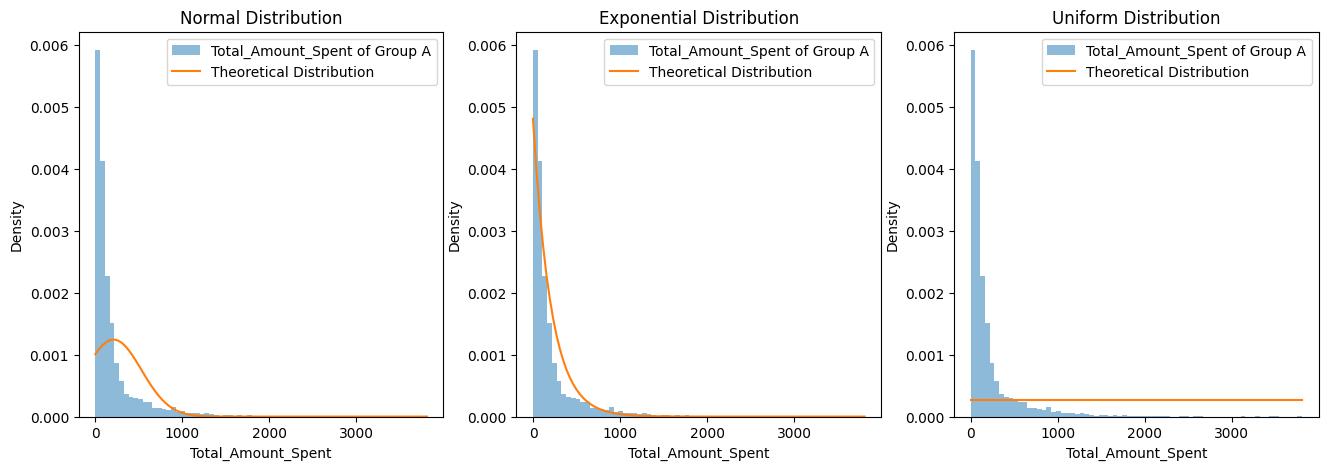

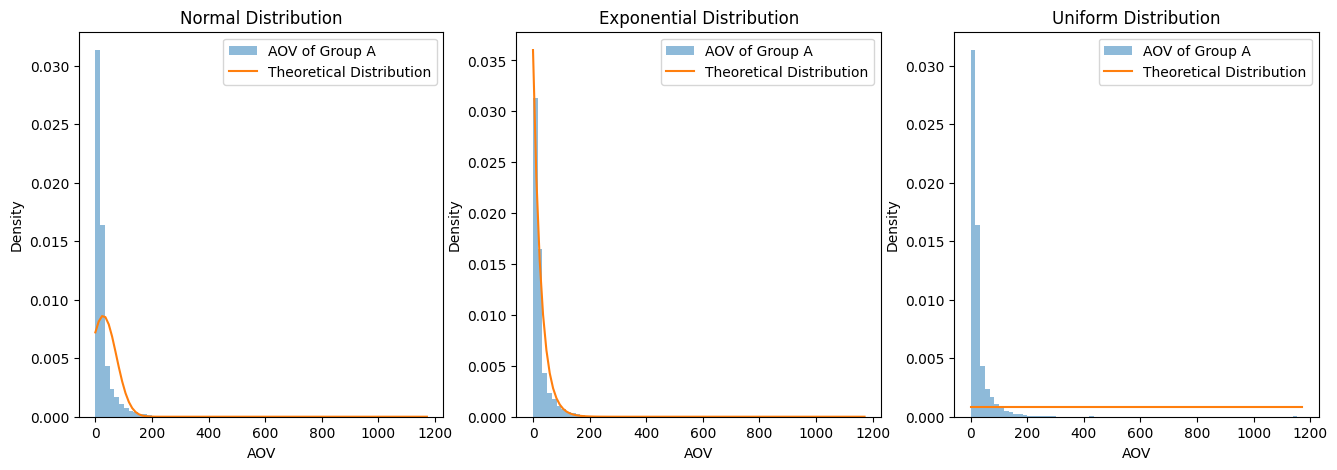

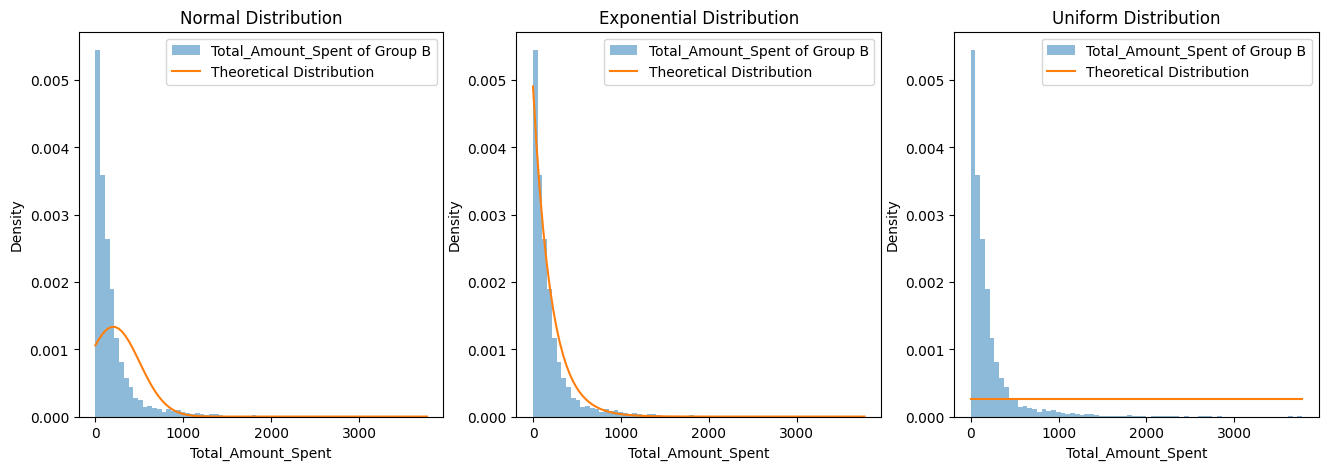

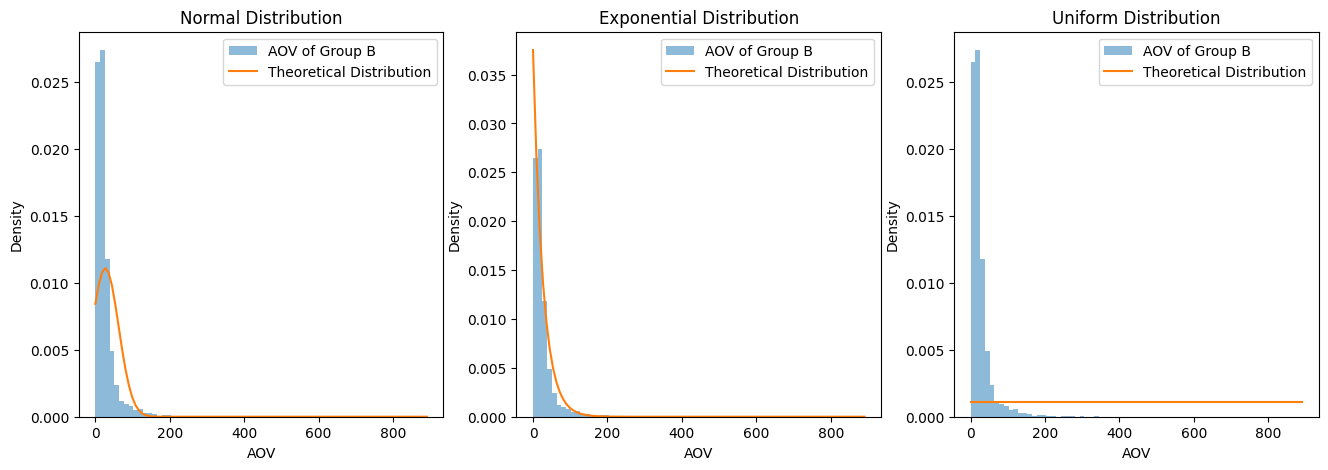

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Set up a function for plotting
def plot_distributions(column, group_name):
    # Calculate the theoretical distributions based on the data
    x_values = np.linspace(min(column), max(column), 100)  
    distributions = {  # Create a dictionary with calculated theoretical distributions
        'Normal': stats.norm.pdf(x_values, *stats.norm.fit(column)),
        'Exponential': stats.expon.pdf(x_values, *stats.expon.fit(column)),
        'Uniform': stats.uniform.pdf(x_values, loc=min(column), scale=max(column)-min(column))
    }

    # Set up a plot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))  
    
    # Loop through each subplot and distribution
    for ax, (distribution_name, distribution) in zip(axes, distributions.items()):
        ax.hist(column, bins=70, alpha=0.5, label=f'{column.name} of {group_name}', density=True)
        ax.plot(x_values, distribution, label='Theoretical Distribution')
        ax.set_title(f'{distribution_name} Distribution')
        ax.set_xlabel(column.name)
        ax.set_ylabel('Density')
        ax.legend()

    plt.show()

# Calling the function
plot_distributions(data_a['Total_Amount_Spent'], 'Group A')
plot_distributions(data_a['AOV'], 'Group A')
plot_distributions(data_b['Total_Amount_Spent'], 'Group B')
plot_distributions(data_b['AOV'], 'Group B')

## Outlier Detection

It is important to identify outliers in the dataset, as they can skew the results of the analysis. In every A/B test and dataset, there are instances where data exhibits a degree of randomness. This activity aims to detect and eliminate unusual observations. 

In summary, we will use the Interquartile Range (IQR) method to detect outliers.  We will also determine the lower and upper boundaries.  Any data points that fall outside these boundaries will be considered outliers.

To calculate the boundaries, we will use the following formula:

- Lower Bound = Q1 - 1.5 * IQR
- Upper Bound = Q3 + 1.5 * IQR

The objective is to determine all values that are generally 3 standard deviations away from the mean in both directions.  Additionally, we use the factor 1.5, which is a common choice in practice to balance robustness and accuracy.

In [5]:
# Create a function to detect outliers
def detect_outliers(column):
    # Normalize the data
    transformed_data, _ = stats.boxcox(column + 1)

    # Calculate Interquartile Range (IQR)
    Q1 = np.percentile(transformed_data, 25)
    Q3 = np.percentile(transformed_data, 75)
    IQR = Q3 - Q1

    # Calculate boundaries based on the IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outlier_indices = column.index[(transformed_data < lower_bound) | (transformed_data > upper_bound)]

    return outlier_indices

# Extract outlier indices
data_a_spent_outliers = detect_outliers(data_a['Total_Amount_Spent'])
data_b_spent_outliers = detect_outliers(data_b['Total_Amount_Spent'])
data_a_aov_outliers = detect_outliers(data_a['AOV'])
data_b_aov_outliers = detect_outliers(data_b['AOV'])

# Print outlier quantity for each column and group
print(f'Total_Amount_Spent, Group A: {data_a_spent_outliers.size}')
print(f'Total_Amount_Spent, Group B: {data_b_spent_outliers.size}')
print(f'AOV, Group A: {data_a_aov_outliers.size}')
print(f'AOV, Group B: {data_b_aov_outliers.size}')

Total_Amount_Spent, Group A: 65
Total_Amount_Spent, Group B: 70
AOV, Group A: 433
AOV, Group B: 381


## Outlier Removal
In this step, we will remove the outliers from both datasets.  The resulting  dataframes show a lower count than the original ones because of the outliers removed.

In [6]:
# Filter group A data
data_a_filtered = data_a.drop(data_a_spent_outliers)
data_a_filtered = data_a_filtered.drop(data_a_aov_outliers, errors='ignore')

# Filter group B data
data_b_filtered = data_b.drop(data_b_spent_outliers)
data_b_filtered = data_b_filtered.drop(data_b_aov_outliers, errors='ignore')

# Display filtered data
display(data_a_filtered)
display(data_b_filtered)

,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV,Group
0,90.987906,496.88,12,47.348084,A
1,50.794390,347.66,14,38.614252,A
2,66.206264,161.50,13,21.520578,A
3,61.225810,70.91,8,11.533441,A
4,122.862188,1014.99,14,90.846582,A
...,...,...,...,...,...
4995,101.266367,100.60,23,17.340411,A
4996,53.983563,183.99,14,20.652185,A
4997,74.526835,463.80,21,32.932672,A
4998,69.242324,23.59,15,8.553449,A


,Time_Spent_on_Site,Total_Amount_Spent,Page_Views,AOV,Group
5000,68.119998,80.77,17,15.306463,B
5001,46.363129,757.89,14,98.879776,B
5002,76.004365,34.47,14,8.435420,B
5003,70.897366,77.14,14,14.927193,B
5005,57.996547,34.09,14,6.325083,B
...,...,...,...,...,...
9995,110.375357,99.26,30,22.399053,B
9996,172.102860,52.29,40,29.303279,B
9997,134.548224,332.94,27,52.063372,B
9998,68.672467,233.74,24,28.713010,B


## Conducting A/B test
And finally, we will invoke the Mann-Whitney U test to compare the two groups.  This test help us determine if there is a significant difference between the two groups.

The Mann-Whitney U returns a p-value, which will be used to determine if there is a statistical evidence to reject the null hypothesis.

 In this context, the null hypothesis (H0) states that there is no significant difference between the two groups.  If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference between the two groups.

 In the context of this project, if the p-value is less than 0.05, we can conclude that the changes implemented on the platform have a significant impact on the `AOV` and `Total_Amount_Spent`.


In [7]:
# Create a function that performs an A/B test
def ab_test(sample_a, sample_b, column_name):
    # Perform the Mann-Whitney U test on the specified column of both samples
    _, p = stats.mannwhitneyu(sample_a[column_name], sample_b[column_name], alternative='less')
    
    # Check if the p-value is less than 0.05 to determine if we reject the null hypothesis
    if p < 0.05:
        print(f'{column_name}: Group B wins (reject H0)')
    else:
        print(f'{column_name}: Group A wins (fail to reject H0)')
    
    # Print the p-value
    print(f'p-value = {p}\n')
        
# Run an A/B test on unfiltered data (on the full dataset, which means that includes the outliers)
ab_test(data_a, data_b, 'AOV')
ab_test(data_a, data_b, 'Total_Amount_Spent')

# Run an A/B test on filtered data (without the outliers)

ab_test(data_a_filtered, data_b_filtered, 'AOV')
ab_test(data_a_filtered, data_b_filtered, 'Total_Amount_Spent')

AOV: Group B wins (reject H0)
p-value = 0.0005853117575575501

Total_Amount_Spent: Group B wins (reject H0)
p-value = 0.00018182453359100208

AOV: Group B wins (reject H0)
p-value = 0.00022581959090150434

Total_Amount_Spent: Group B wins (reject H0)
p-value = 7.432759229333209e-05



## Conclusion

In this project, we conducted an A/B test to evaluate the impact of changes implemented on a e-commerce platform.  We used descriptive statistics, histograms, and the Mann-Whitney U test to draw conclusions about the data.

The results show that the changes implemented on the platform have a significant impact on the `AOV` and `Total_Amount_Spent`.
